In [1]:
import math

import e3nn_jax as e3j
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tensorial.signals import radials

In [2]:
r_cut = 6.
n_radials = 5

rads = radials.E3nnRadial("gaussian", number=n_radials, max_radius=r_cut, cutoff=False)

In [3]:
jx = jnp.linspace(0., 6., 100)
jy = rads.evaluate(jx)

2024-04-05 12:16:35.420713: W external/xla/xla/service/gpu/nvptx_compiler.cc:679] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.4.99). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


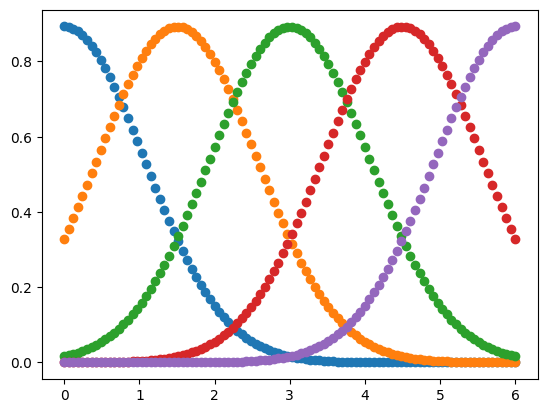

In [4]:
for n in range(n_radials):
    plt.scatter(jx, jy[:, n])

In [5]:
smoothed = radials.E3nnPolyEnvelope(
    rads, 
    smoothing_start=r_cut - 1., 
    n0=1, 
    n1=1
)
jy_smoothed = smoothed.evaluate(jx)

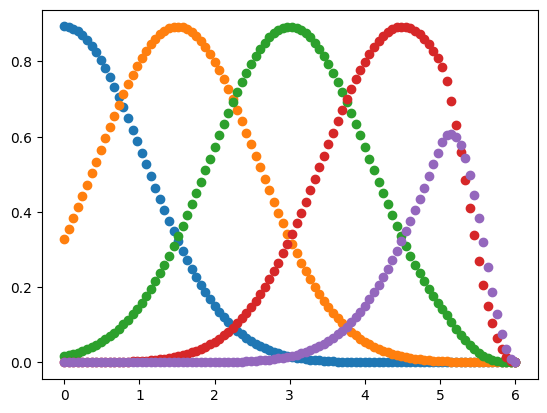

In [6]:
for n in range(n_radials):
    plt.scatter(jx, jy_smoothed[:, n])

In [7]:
ortho_rads = radials.OrthoBasis(smoothed, 100)
jy_ortho = ortho_rads.evaluate(jx)

/home/martin/src/tensorial/src/tensorial/signals/radials.py:144: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  r_normalized_floor_int = jnp.floor(r_normalized).astype(jnp.int64)


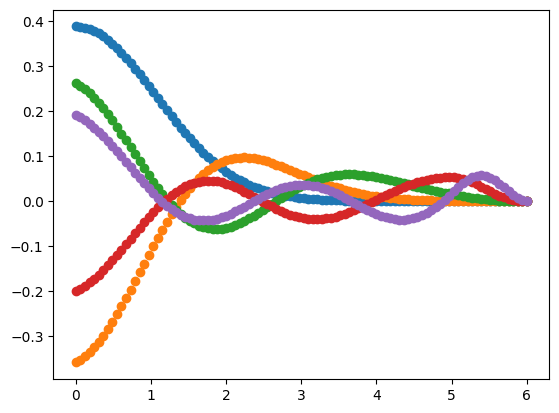

In [8]:
for n in range(n_radials):
    plt.scatter(jx, jy_ortho[:, n])

In [9]:
import jax
from jax_md import nn

jmdb = nn.util.BesselEmbedding(
    count=n_radials, 
    inner_cutoff=r_cut,  
    outer_cutoff=r_cut,
)

key = jax.random.PRNGKey(0)
params = jmdb.init(key, jx)
jy = jmdb.apply(params, jx)

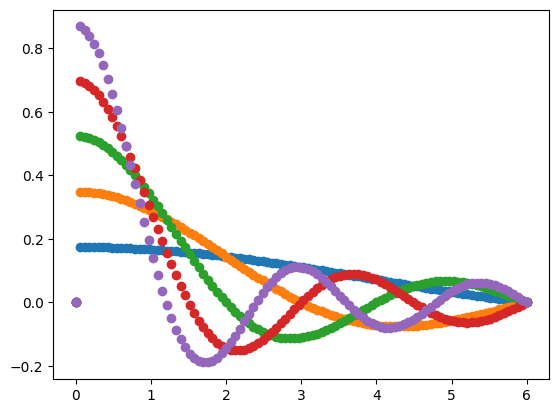

In [10]:
for n in range(n_radials):
    plt.scatter(jx, jy[:, n])

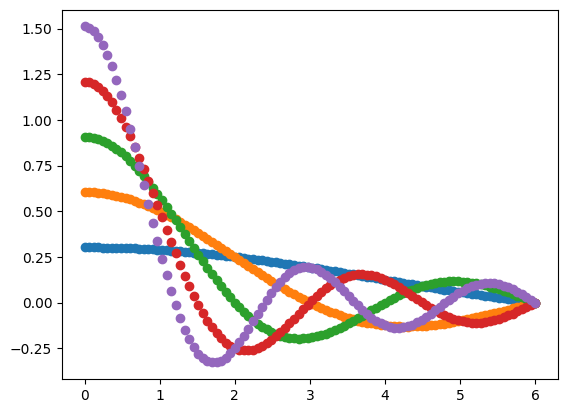

In [11]:
jy_e3jb = e3j.bessel(jx, n_radials, r_cut)
for n in range(n_radials):
    plt.scatter(jx, jy_e3jb[:, n])

(-0.01, 0.01)

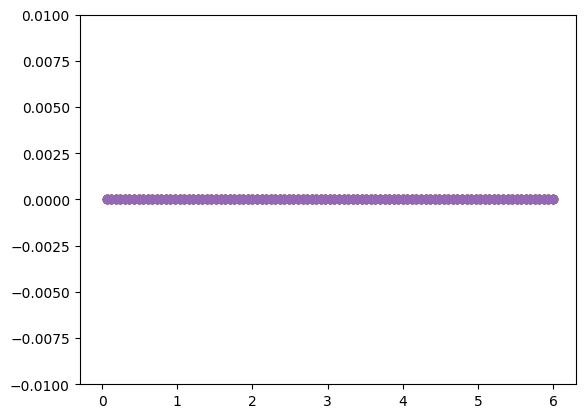

In [12]:
diff = 1 / 3**.5 * jy_e3jb - jy
for n in range(n_radials):
    plt.scatter(jx, diff[:, n])
plt.ylim([-0.01, 0.01])

In [13]:
diff

Array([[ 1.74532920e-01,  3.49065840e-01,  5.23598790e-01,
         6.98131680e-01,  8.72664630e-01],
       [-4.47034836e-08, -5.96046448e-08, -5.96046448e-08,
        -5.96046448e-08, -5.96046448e-08],
       [-2.98023224e-08, -2.98023224e-08,  0.00000000e+00,
        -5.96046448e-08, -5.96046448e-08],
       [-1.49011612e-08, -2.98023224e-08, -5.96046448e-08,
        -1.19209290e-07, -1.19209290e-07],
       [-1.49011612e-08, -2.98023224e-08,  0.00000000e+00,
        -5.96046448e-08,  0.00000000e+00],
       [-4.47034836e-08, -2.98023224e-08, -5.96046448e-08,
         0.00000000e+00, -1.19209290e-07],
       [-1.49011612e-08, -5.96046448e-08, -2.98023224e-08,
        -5.96046448e-08, -5.96046448e-08],
       [-2.98023224e-08,  0.00000000e+00, -2.98023224e-08,
         0.00000000e+00, -1.19209290e-07],
       [-1.49011612e-08, -2.98023224e-08, -2.98023224e-08,
        -1.19209290e-07, -5.96046448e-08],
       [-1.49011612e-08, -2.98023224e-08, -2.98023224e-08,
         0.00000000e+00